In [1]:
from math import cos, sin, pi as π

import numpy as np
from numpy.linalg import svd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 18

In [2]:
def sphere(n=20):
    u = np.linspace(-π, π, n)
    v = np.linspace(0,  π, n)

    X = np.outer(np.cos(u), np.sin(v))
    Y = np.outer(np.sin(u), np.sin(v))
    Z = np.outer(np.ones_like(u), np.cos(v))
    return X, Y, Z

def surface(X, Y, Z, C, ax=None):
    if ax is None:
        fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    ax.plot_surface(
        X, Y, Z,
        cmap='turbo', alpha=0.45, facecolors=plt.cm.turbo(C),
        linewidth=0.5, rcount=30, ccount=30,
    ).set_edgecolor('black')
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(-2, 2)

In [3]:
# Angles of rotation
θ_x, θ_y, θ_z = π/15, -π/9, -π/20

# Rotation about x axis
R_x = np.array([
    [1, 0,         0       ],
    [0, cos(θ_x), -sin(θ_x)],
    [0, sin(θ_x),  cos(θ_x)]
])

# Rotation about y axis
R_y = np.array([
    [ cos(θ_y), 0, sin(θ_y)],
    [ 0,        1, 0       ],
    [-sin(θ_y), 0, cos(θ_y)]
])

# Rotation about z axis
R_z = np.array([
    [cos(θ_z), -sin(θ_z), 0],
    [sin(θ_z),  cos(θ_z), 0],
    [0,         0,        1]
])

# Scaling: x, y, z
S_x, S_y, S_z = 3, 1, 0.5
Σ = np.diag([S_x, S_y, S_z])

# Composite Transformation: Scale and Rotate
T = R_z @ R_y @ R_x @ Σ

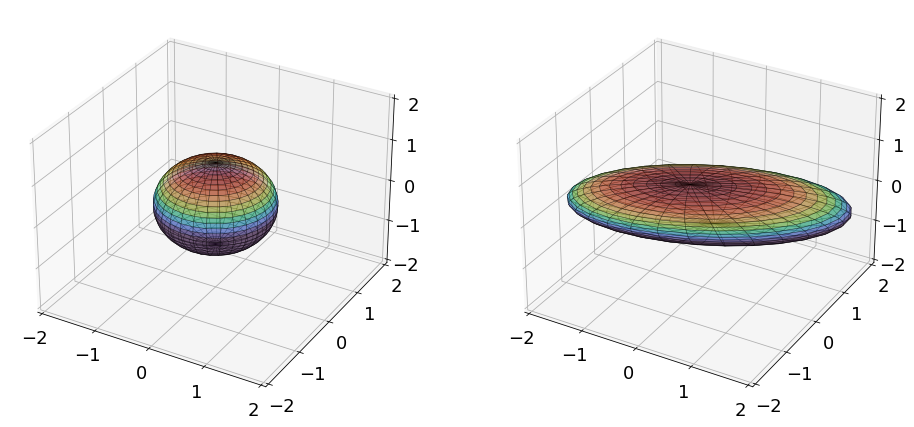

In [4]:
# Figure 1.8

X, Y, Z = sphere(30)

X_R = np.zeros_like(X)
Y_R = np.zeros_like(Y)
Z_R = np.zeros_like(Z)
for ij, _ in np.ndenumerate(X):
    vec = X[ij], Y[ij], Z[ij]
    X_R[ij], Y_R[ij], Z_R[ij] =  T @ vec

# Plot the surfaces
fig, axs = plt.subplots(
    1, 2, figsize=(16, 8),
    subplot_kw=dict(projection='3d')
)
surface(X, Y, Z, C=Z, ax=axs[0])
# Use colour from original sphere
surface(X_R, Y_R, Z_R, C=Z, ax=axs[1])

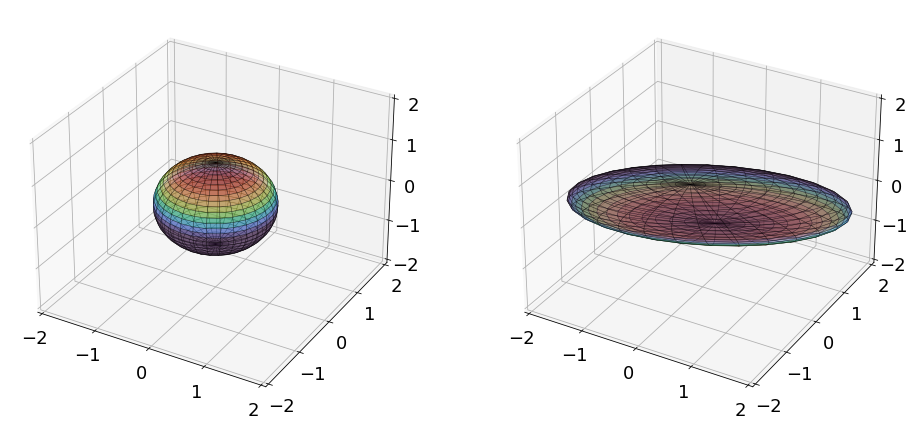

In [5]:
U, S, VT = svd(T)
T_svd = U * S

X_R = np.zeros_like(X)
Y_R = np.zeros_like(Y)
Z_R = np.zeros_like(Z)
for ij, _ in np.ndenumerate(X):
    vec = X[ij], Y[ij], Z[ij]
    X_R[ij], Y_R[ij], Z_R[ij] =  T_svd @ vec

# Plot the surfaces
fig, axs = plt.subplots(
    1, 2, figsize=(16, 8),
    subplot_kw=dict(projection='3d')
)
surface(X, Y, Z, C=Z, ax=axs[0])
# Use colour from original sphere
surface(X_R, Y_R, Z_R, C=Z, ax=axs[1])

In [6]:
print('VT =')
print(np.round(VT).astype(int))

VT =
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
